Matplotlib is building the font cache; this may take a moment.


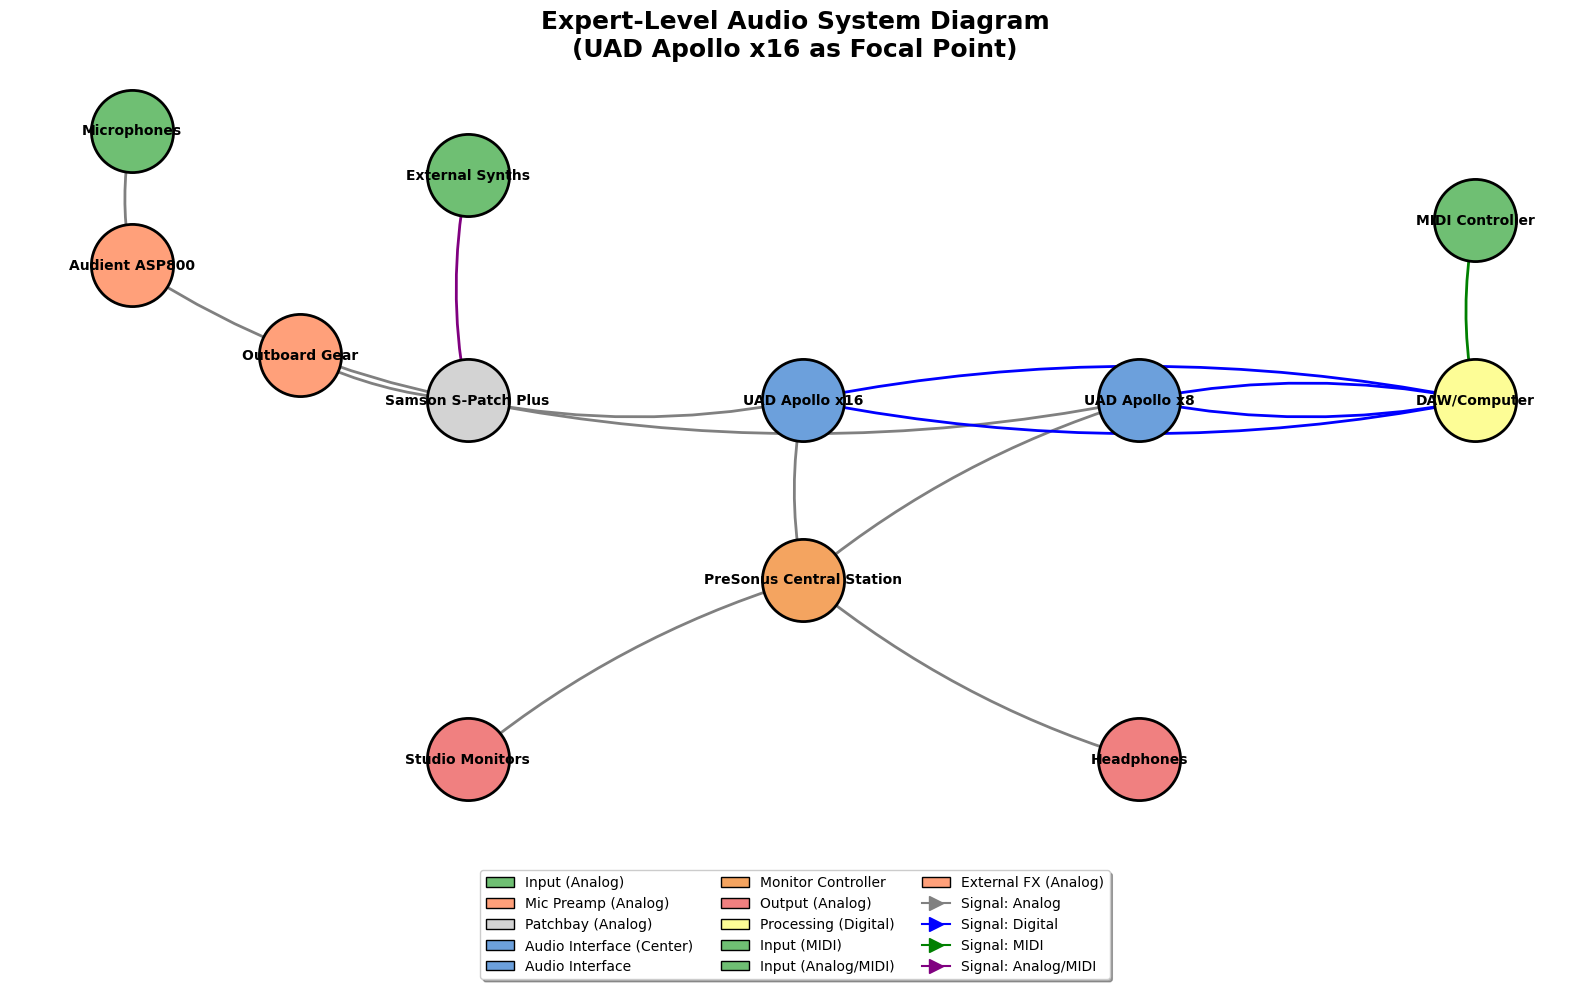

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# ------------------
# 1) Define Devices and Categories
# ------------------
devices = {
    "Microphones":             "Input (Analog)",
    "Audient ASP800":          "Mic Preamp (Analog)",
    "Samson S-Patch Plus":     "Patchbay (Analog)",
    "UAD Apollo x16":          "Audio Interface (Center)",
    "UAD Apollo x8":           "Audio Interface",
    "PreSonus Central Station":"Monitor Controller",
    "Studio Monitors":         "Output (Analog)",
    "Headphones":              "Output (Analog)",
    "DAW/Computer":            "Processing (Digital)",
    "MIDI Controller":         "Input (MIDI)",
    "External Synths":         "Input (Analog/MIDI)",
    "Outboard Gear":           "External FX (Analog)"
}

# Map each category to a node color for clarity
category_colors = {
    "Input (Analog)":          "#6fbf73",   # green-ish
    "Mic Preamp (Analog)":     "#ffa07a",   # salmon
    "Patchbay (Analog)":       "#d3d3d3",   # light gray
    "Audio Interface (Center)":"#6ca0dc",   # special blue for center
    "Audio Interface":         "#6ca0dc",   # same blue
    "Monitor Controller":      "#f4a460",   # sandy brown
    "Output (Analog)":         "#f08080",   # light coral
    "Processing (Digital)":    "#fdfd96",   # pastel yellow
    "Input (MIDI)":            "#6fbf73",   # same green as analog inputs
    "Input (Analog/MIDI)":     "#6fbf73",   # same green
    "External FX (Analog)":    "#ffa07a"    # salmon (like preamps)
}

# ------------------
# 2) Define Connections and Signal Types
# ------------------
# Format: (source, target, signal_type)
connections = [
    ("Microphones", "Audient ASP800", "Analog"),
    ("Audient ASP800", "Samson S-Patch Plus", "Analog"),
    ("Samson S-Patch Plus", "UAD Apollo x16", "Analog"),
    ("Samson S-Patch Plus", "UAD Apollo x8", "Analog"),
    ("UAD Apollo x16", "PreSonus Central Station", "Analog"),
    ("UAD Apollo x8", "PreSonus Central Station", "Analog"),
    ("PreSonus Central Station", "Studio Monitors", "Analog"),
    ("PreSonus Central Station", "Headphones", "Analog"),
    ("UAD Apollo x16", "DAW/Computer", "Digital"),
    ("UAD Apollo x8", "DAW/Computer", "Digital"),
    ("DAW/Computer", "UAD Apollo x16", "Digital"),
    ("DAW/Computer", "UAD Apollo x8", "Digital"),
    ("MIDI Controller", "DAW/Computer", "MIDI"),
    ("External Synths", "Samson S-Patch Plus", "Analog/MIDI"),
    ("Outboard Gear", "Samson S-Patch Plus", "Analog")
]

# Map each signal type to an edge color
signal_colors = {
    "Analog":      "gray",
    "Digital":     "blue",
    "MIDI":        "green",
    "Analog/MIDI": "purple"
}

# ------------------
# 3) Create the Graph
# ------------------
G = nx.DiGraph()

# Add nodes along with their category attribute
for device, category in devices.items():
    G.add_node(device, category=category)

# Add edges with a signal type attribute
for source, target, sig_type in connections:
    G.add_edge(source, target, signal_type=sig_type)

# ------------------
# 4) Manually Position Nodes for Optimal Layout
#    (Setting UAD Apollo x16 at the center)
# ------------------
pos = {
    "Microphones":             (-4,  3),
    "Audient ASP800":          (-4,  1.5),
    "Samson S-Patch Plus":     (-2,  0),
    "UAD Apollo x16":          ( 0,  0),
    "UAD Apollo x8":           ( 2,  0),
    "DAW/Computer":            ( 4,  0),
    "PreSonus Central Station":( 0, -2),
    "Studio Monitors":         (-2, -4),
    "Headphones":              ( 2, -4),
    "MIDI Controller":         ( 4,  2),
    "External Synths":         (-2,  2.5),
    "Outboard Gear":           (-3,  0.5),
}

# ------------------
# 5) Draw the Graph with Enhanced Styling
# ------------------
plt.figure(figsize=(16, 10))
plt.title("Expert-Level Audio System Diagram\n(UAD Apollo x16 as Focal Point)", fontsize=18, fontweight="bold")

# Draw nodes: group by category to apply consistent coloring
for cat in set(devices.values()):
    nodes_of_cat = [node for node, data in G.nodes(data=True) if data["category"] == cat]
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_of_cat,
        node_color=category_colors[cat],
        node_size=3500,
        edgecolors='black',
        linewidths=2
    )

# Draw edges: group by signal type to assign custom colors and styles
for sig, col in signal_colors.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["signal_type"] == sig]
    nx.draw_networkx_edges(
        G, pos,
        edgelist=edges,
        edge_color=col,
        width=2,
        arrows=True,
        arrowsize=20,
        connectionstyle='arc3,rad=0.1'
    )

# Draw labels with enhanced readability
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color='black')

# ------------------
# 6) Create a Custom Legend for Clarity
# ------------------
legend_elements = []

# Legend for node categories
for cat, color in category_colors.items():
    patch = mpatches.Patch(facecolor=color, edgecolor='black', label=cat)
    legend_elements.append(patch)

# Legend for signal types
for sig, col in signal_colors.items():
    line = mlines.Line2D([], [], color=col, marker='>', markersize=10, linestyle='-',
                         label=f"Signal: {sig}")
    legend_elements.append(line)

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fancybox=True, shadow=True, fontsize=10)

plt.axis('off')
plt.tight_layout()

# Optionally, save the diagram:
# plt.savefig("improved_audio_system_diagram.png", dpi=300, bbox_inches="tight")

plt.show()